A comparative study of various implicit and explicit schemes to solve 1-Dimensional burgers equation

 Burger equation is given by:
$$\frac{\partial u }{\partial t} + u*\frac{\partial u }{\partial x} - \frac{1}{ re} * \frac{\partial^2 u }{\partial^2 x} = 0$$

where re = reynolds number

initial conditions:

$u_o(x) = \bar u(x,0) = 1$ for $- x_{max} \le x \le 0$ 

$u_o(x) = \bar u(x,0) = 0$ for $ 0\le x \le x_{max}$ 

boundary conditions:

$u(- x_{max} ,t) = 1$ , $- \bar u(x_{max},t) = 0$ 

In [27]:
from matplotlib import pyplot                  # importing pyplot       
import numpy as np    # importing numpy

## Explicit scheme


solving burgers equation using FTBS scheme: 


$ u_j ^{n+1} = u_j ^n - \frac{\Delta t}{\Delta x } *(F(u_j ^n)-F(u_{j-1} ^n)) + \frac{\Delta t}{ \Delta x^2} *(u_{j-1} ^n -2*u_j ^n +u_{j+1} ^n) $ 

where $F(u_j ^n) = \frac {u^2}{2} $

In [83]:

def ftbs(nx,nt,dx,dt,nu):     # defining ftbs
    uv = np.zeros(nx)       # initializing 
    uv[0:int(1 / dx + 1)] = 1  # changing first n/2 into 1s 
    uold = np.zeros(nx)   # initializing a dummy to store uv
    
    f = lambda uv : uv**2/2    # flux function
    for n in range(nt):                     
        uold = np.copy(uv)      #copyying uv into uold
        for i in range(1,nx-1):                 
            uv[0]=1      # boundary conditions
            uv[-1]=0
            uv[i] = uold[i] -  dt / (dx) *(f(uold[i]) - f(uold[i-1])) + nu * dt / dx**2 *\
                    (uold[i+1] - 2 * uold[i] + uold[i-1])
    return uv

#ui = ftbs(52,470,2/50,0.001,1/50)
#pyplot.plot(np.linspace(-1, 1, 52), ui);

Lax- Friedrich scheme

$ u_j ^{n+1} = \frac {u_{j+1} ^n+u_{j-1}}{2} - \frac{\Delta t}{\Delta x } *(F(u_{j+1} ^n)-F(u_{j-1} ^n)) + \frac{\Delta t}{ \Delta x^2} *(u_{j-1} ^n -2*u_j ^n +u_{j+1} ^n) $ 

In [84]:
def lax(nx,nt,dx,dt,nu):  # defining lax fridrich
    uv = np.zeros(nx)    # initializing 
    uv[0:int(1 / dx + 1)] = 1  # changing first n/2 into 1s
    uold = np.zeros(nx)    # initializing a dummy to store uv
    
    f = lambda uv : uv**2/2   # flux function
    for n in range(nt):                     
        uold = np.copy(uv)     #copyying uv into uold
        for i in range(1,nx-1):                 
            uv[0]=1
            uv[-1]=0
            uv[i] = (uold[i+1] + uold[i-1])/2  -(dt / (2*dx) )*(f(uold[i+1]) - f(uold[i-1])) + nu * dt / dx**2 *\
                    (uold[i+1] - 2 * uold[i] + uold[i-1])
    return uv


#ul = lax(52,470,2/50,0.0001,1/50)

FTCS scheme

$ u_j ^{n+1} = u_j ^n - \frac{\Delta t}{\Delta x } *(F(u_{j+1} ^n)-F(u_{j-1} ^n)) + \frac{\Delta t}{ \Delta x^2} *(u_{j-1} ^n -2*u_j ^n +u_{j+1} ^n) $ 

In [85]:

def ftcs(nx,nt,dx,dt,nu):    # defining ftcs
    uv = np.zeros(nx)     # initializing
    uv[0:int(1 / dx + 1)] = 1  # changing first n/2 into 1s
    uold = np.zeros(nx)    # initializing a dummy to store uv
    
    f = lambda uv : uv**2/2    # flux function
    for n in range(nt):                     
        uold = np.copy(uv)    #copyying uv into uold
        for i in range(1,nx-1):                 
            uv[0]=1
            uv[-1]=0
            uv[i] = uold[i] -  (dt / (2*dx)) *(f(uold[i+1]) - f(uold[i-1])) + nu * dt / dx**2 *\
                    (uold[i+1] - 2 * uold[i] + uold[i-1])
    return uv

#uc = ftcs(52,470,2/50,0.001,1/50)
#pyplot.plot(np.linspace(-1, 1, nx), ui)

## Implicit scheme

crank nicolson scheme

The crank nicolson scheme that said gave in the lecture seems to have some error so I have derived the crank nicolson scheme again. the derivation is available in the zip file

the final equation is given by:
    $$a*u_{j-1} ^{n+1} + b*u_{j} ^{n+1} +c*u_{j+1} ^{n+1} =d $$

where,
$a = \frac{-s}{2} *u_{j-1} ^{n}- \frac{s* \nu}{\Delta x} $


$b = 1+ \frac{2*s* \nu}{\Delta x} $


$c = \frac{s}{2}*u_{j+1} ^{n} - \frac{s*\nu}{\Delta x}$


$d = ((1-\frac{2*s* \nu}{\Delta x} )* u_{j+1} ^{n} + \frac{s*\nu}{\Delta x}*(u_{j+1} ^{n}+u_{j-1} ^{n}) ) $



$s = \frac{\Delta t}{2* \Delta x}$  (note : the 's' that i defined here is different to what sir has defined )

In [86]:
def TDMA(a, b, c, d):   #

    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc



def cn(nx,nt,dx,dt,nu):
    u = np.zeros(nx)     # initializing
    a = np.zeros(nx)
    b = np.zeros(nx)
    c = np.zeros(nx)
    d = np.zeros(nx)  
    s = 0.5*dt/(dx)   # value of s as defined in the explination
    u[0:int(1 / dx + 1)] = 1   # # changing first n/2 into 1s

    
    
    for n in range(nt):
        u[0]=1   # boundary conditions
        u[-1]=0
    
        for i in range(1,nx-1):  
            a[i] = -0.5*s*u[i-1] - s*nu/dx
            b[i] = 1+ 2*s*nu/dx
            c[i] = 0.5*s*u[i+1] -s*nu/dx
            d[i] = (1-2*s*nu/dx)*u[i] + (s*nu/dx)*(u[i+1]+u[i-1])
        
        u[1:nx-1] = TDMA(a[2:nx-1], b[1:nx-1], c[1:nx-2], d[1:nx-1])  
   
    return u[1:nx-1]

#cr = cn(52,470,2/50,0.001,1/50)
#pyplot.plot(np.linspace(-1, 1, 50), cr)
    

        



## Reynolds number = 10 , time = 0.47

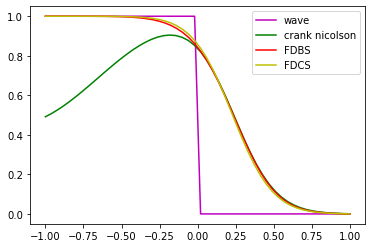

In [87]:
ui = ftbs(52,470,2/50,0.001,1/10)
ul = lax(52,470,2/50,0.0001,1/10)
cr = cn(52,470,2/50,0.001,1/10)
uc = ftcs(52,470,2/50,0.001,1/10)
u = np.zeros(52) 
u[0:int(1 / dx + 1)] = 1
pyplot.plot(np.linspace(-1, 1, 52), u,color='m',label ='wave')
pyplot.plot(np.linspace(-1, 1, 50), cr,color='g',label ='crank nicolson')
pyplot.plot(np.linspace(-1, 1, 52), ui,color='r',label ='FDBS')
#pyplot.plot(np.linspace(-1, 1, 52), ul,color='b',label ='lax fridrich')
pyplot.plot(np.linspace(-1, 1, 52), uc,color='y',label ='FDCS')
pyplot.legend()

#pyplot.plot(np.linspace(-1, 1, nx-2), cr)

## Reynolds number = 50 , time = 0.47

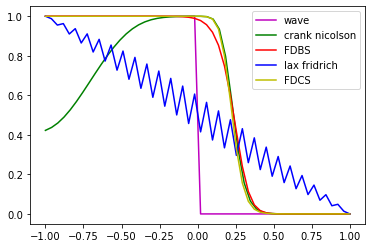

In [88]:
ui = ftbs(52,470,2/50,0.001,1/50)
ul = lax(52,470,2/50,0.0001,1/50)
cr = cn(52,470,2/50,0.001,1/50)
uc = ftcs(52,470,2/50,0.001,1/50)
u = np.zeros(52) 
u[0:int(1 / dx + 1)] = 1
pyplot.plot(np.linspace(-1, 1, 52), u,color='m',label ='wave')
pyplot.plot(np.linspace(-1, 1, 50), cr,color='g',label ='crank nicolson')
pyplot.plot(np.linspace(-1, 1, 52), ui,color='r',label ='FDBS')
pyplot.plot(np.linspace(-1, 1, 52), ul,color='b',label ='lax fridrich')
pyplot.plot(np.linspace(-1, 1, 52), uc,color='y',label ='FDCS')
pyplot.legend()


## Reynolds number = 10 , time = 0.36

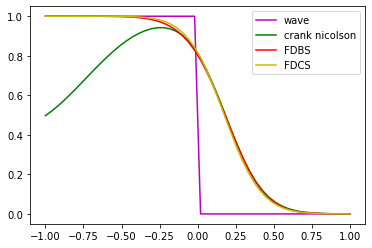

In [89]:
ui = ftbs(52,360,2/50,0.001,1/10)
ul = lax(52,360,2/50,0.0001,1/10)
cr = cn(52,360,2/50,0.001,1/10)
uc = ftcs(52,360,2/50,0.001,1/10)
u = np.zeros(52) 
u[0:int(1 / dx + 1)] = 1
pyplot.plot(np.linspace(-1, 1, 52), u,color='m',label ='wave')
pyplot.plot(np.linspace(-1, 1, 50), cr,color='g',label ='crank nicolson')
pyplot.plot(np.linspace(-1, 1, 52), ui,color='r',label ='FDBS')
#pyplot.plot(np.linspace(-1, 1, 52), ul,color='b',label ='lax fridrich')
pyplot.plot(np.linspace(-1, 1, 52), uc,color='y',label ='FDCS')
pyplot.legend()

## Reynolds number = 50 , time = 0.36

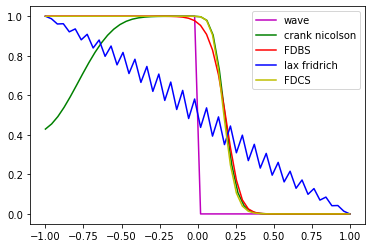

In [90]:
ui = ftbs(52,360,2/50,0.001,1/50)
ul = lax(52,360,2/50,0.0001,1/50)
cr = cn(52,360,2/50,0.001,1/50)
uc = ftcs(52,360,2/50,0.001,1/50)
u = np.zeros(52) 
u[0:int(1 / dx + 1)] = 1
pyplot.plot(np.linspace(-1, 1, 52), u,color='m',label ='wave')
pyplot.plot(np.linspace(-1, 1, 50), cr,color='g',label ='crank nicolson')
pyplot.plot(np.linspace(-1, 1, 52), ui,color='r',label ='FDBS')
pyplot.plot(np.linspace(-1, 1, 52), ul,color='b',label ='lax fridrich')
pyplot.plot(np.linspace(-1, 1, 52), uc,color='y',label ='FDCS')
pyplot.legend()


keeping time constant and increasing renolds number the graph is looking more sinosoidal


this can be further analysed using crank nicolson scheme

## analysing crank nicolson by varying reynolds number

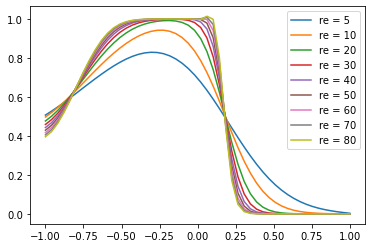

In [91]:
cr10 = cn(52,360,2/50,0.001,1/10)
cr20 = cn(52,360,2/50,0.001,1/20)
cr30 = cn(52,360,2/50,0.001,1/30)
cr40 = cn(52,360,2/50,0.001,1/40)
cr50 = cn(52,360,2/50,0.001,1/50)
cr60 = cn(52,360,2/50,0.001,1/60)
cr70 = cn(52,360,2/50,0.001,1/70)
cr80 = cn(52,360,2/50,0.001,1/80)
cr05 = cn(52,360,2/50,0.001,1/5)

pyplot.plot(np.linspace(-1, 1, 50), cr05,label ='re = 5')
pyplot.plot(np.linspace(-1, 1, 50), cr10,label ='re = 10')
pyplot.plot(np.linspace(-1, 1, 50), cr20,label ='re = 20')
pyplot.plot(np.linspace(-1, 1, 50), cr30,label ='re = 30')
pyplot.plot(np.linspace(-1, 1, 50), cr40,label ='re = 40')
pyplot.plot(np.linspace(-1, 1, 50), cr50,label ='re = 50')
pyplot.plot(np.linspace(-1, 1, 50), cr60,label ='re = 60')
pyplot.plot(np.linspace(-1, 1, 50), cr70,label ='re = 70')
pyplot.plot(np.linspace(-1, 1, 50), cr80,label ='re = 80')
pyplot.legend()

## analysing crank nicolson by varying time

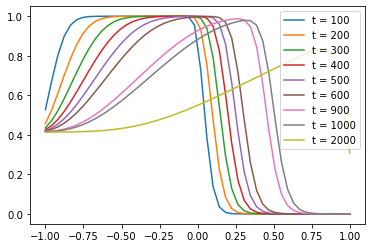

In [92]:
cr10 = cn(52,100,2/50,0.001,1/50)
cr20 = cn(52,200,2/50,0.001,1/50)
cr30 = cn(52,300,2/50,0.001,1/50)
cr40 = cn(52,400,2/50,0.001,1/50)
cr50 = cn(52,500,2/50,0.001,1/50)
cr60 = cn(52,600,2/50,0.001,1/50)
cr70 = cn(52,900,2/50,0.001,1/50)
cr80 = cn(52,1000,2/50,0.001,1/50)
cr90 = cn(52,2000,2/50,0.001,1/50)


pyplot.plot(np.linspace(-1, 1, 50), cr10,label ='t = 100')
pyplot.plot(np.linspace(-1, 1, 50), cr20,label ='t = 200')
pyplot.plot(np.linspace(-1, 1, 50), cr30,label ='t = 300')
pyplot.plot(np.linspace(-1, 1, 50), cr40,label ='t = 400')
pyplot.plot(np.linspace(-1, 1, 50), cr50,label ='t = 500')
pyplot.plot(np.linspace(-1, 1, 50), cr60,label ='t = 600')
pyplot.plot(np.linspace(-1, 1, 50), cr70,label ='t = 900')
pyplot.plot(np.linspace(-1, 1, 50), cr80,label ='t = 1000')
pyplot.plot(np.linspace(-1, 1, 50), cr90,label ='t = 2000')
pyplot.legend()

## conclusion

The implicit scheme is more suitable to use because it is more stable compared to other schemes
It is also clear thar at low viscosities this CN scheme is not that efficient


Explicit schemes doesnt show  wave nature of the shock wave as much  compared  to implicit schemes shows

we know that burgers equation helps us to understand the formation of the shock wave. the effect of the viscous term reduces the amplitude of the wave as time increases